## Introduction


Breast cancer is a form of cancer that spreads in breast cells and is the the second most common form of cancer in women. While once highly difficult to treat, survival rates are improving due to the emphasis of early screening and the use of novel technology, 
like machine learning techniques,  in effective detection of breast cancer. In this project, I develop an algorithm to classify cancerous cells. To accomplish this task, I use a dataset obtained from the UCI machine learning repository. This dataset contains 698 rows containing a slightly higher number of non-cancerous cell cases.  The dataset also contains 11 different columns rating different aspects of the cells shape and development state on a scale of 1-10. The 'Class' variable is my desired target variable and it takes value 2 in case of non-cancerous cell and 4 otherwise. In this project,  I aim to look for the traits that are most indicative of whether or not an individual will be diagnosed in addition to testing several different supervised learning models for the most accurate detection of cancerous cells, including: 
- Native Bayes Classifier
- Knn classifier
- Random Forest
- Decision tree 
- Logistic regression 
- Svm classifier 
- Gradient boosted classifier 

I use gridsearch cv to find the ideal parameters for each of the classifiers I use. I also use a  number of different metrics to evaluate the performance of each of the models. The AUC and ROC plots reveal the positive to false positive rate and helps visually compare the effectiveness of the classifier. I use holdout grouping, cross-validation, and run classification reports on each of the models. 


### Exploration

In [73]:
import numpy as np
import pandas as pd
import scipy
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


In [2]:
cancer = pd.read_csv('breast-cancer-wisconsin.data')
cancer

,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4
5,1018099,1,1,1,1,2,10,3,1,1,2
6,1018561,2,1,2,1,2,1,3,1,1,2
7,1033078,2,1,1,1,2,1,1,1,5,2
8,1033078,4,2,1,1,2,1,2,1,1,2
9,1035283,1,1,1,1,1,1,3,1,1,2


In [3]:
cancer.describe()

,1000025,5,1,1.1,1.2,2,3,1.4,1.5,2.1
count,6.980000e+02,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000
mean,1.071807e+06,4.416905,3.137536,3.210602,2.809456,3.217765,3.438395,2.869628,1.590258,2.690544
std,6.175323e+05,2.817673,3.052575,2.972867,2.856606,2.215408,2.440056,3.055004,1.716162,0.951596
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.702582e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238354e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [4]:
# Renaming cols to match function
cancer['class'] = cancer['2.1']
cancer['mitoses'] = cancer['1.5']
cancer['normal nucleoli'] = cancer['1.4']
cancer['bland chromatin'] = cancer['3']
cancer['bare nuclei'] = cancer['1.3']

cancer['single epithelial cell size'] = cancer['2']
cancer['marginal adhesion'] = cancer['1.2']
cancer['uniformity of cell shape'] = cancer['1.1']
cancer['uniformity of cell size'] = cancer['1']
cancer['clump thickness'] = cancer['5']

In [47]:
# dropping due to inablity to convert object 
cancer = cancer.drop('bare nuclei',axis=1)

In [5]:
# Removing old col without labels 
cancer = cancer.drop('2.1',axis=1)
cancer = cancer.drop('1.5',axis=1)
cancer = cancer.drop('1.4',axis=1)
cancer = cancer.drop('3',axis=1)
cancer = cancer.drop('1.3',axis=1)
cancer = cancer.drop('2',axis=1)
cancer = cancer.drop('1.2',axis=1)
cancer = cancer.drop('1.1',axis=1)
cancer = cancer.drop('1',axis=1)
cancer = cancer.drop('5',axis=1)
cancer = cancer.drop('1000025',axis=1)


In [7]:
cancer.describe()

,class,mitoses,normal nucleoli,bland chromatin,single epithelial cell size,marginal adhesion,uniformity of cell shape,uniformity of cell size,clump thickness
count,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000
mean,2.690544,1.590258,2.869628,3.438395,3.217765,2.809456,3.210602,3.137536,4.416905
std,0.951596,1.716162,3.055004,2.440056,2.215408,2.856606,2.972867,3.052575,2.817673
min,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000
50%,2.000000,1.000000,1.000000,3.000000,2.000000,1.000000,1.000000,1.000000,4.000000
75%,4.000000,1.000000,4.000000,5.000000,4.000000,4.000000,5.000000,5.000000,6.000000
max,4.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [8]:
#drop missing values 
cancer = cancer.dropna()

In [9]:
cancer.describe()

,class,mitoses,normal nucleoli,bland chromatin,single epithelial cell size,marginal adhesion,uniformity of cell shape,uniformity of cell size,clump thickness
count,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000
mean,2.690544,1.590258,2.869628,3.438395,3.217765,2.809456,3.210602,3.137536,4.416905
std,0.951596,1.716162,3.055004,2.440056,2.215408,2.856606,2.972867,3.052575,2.817673
min,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000
50%,2.000000,1.000000,1.000000,3.000000,2.000000,1.000000,1.000000,1.000000,4.000000
75%,4.000000,1.000000,4.000000,5.000000,4.000000,4.000000,5.000000,5.000000,6.000000
max,4.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


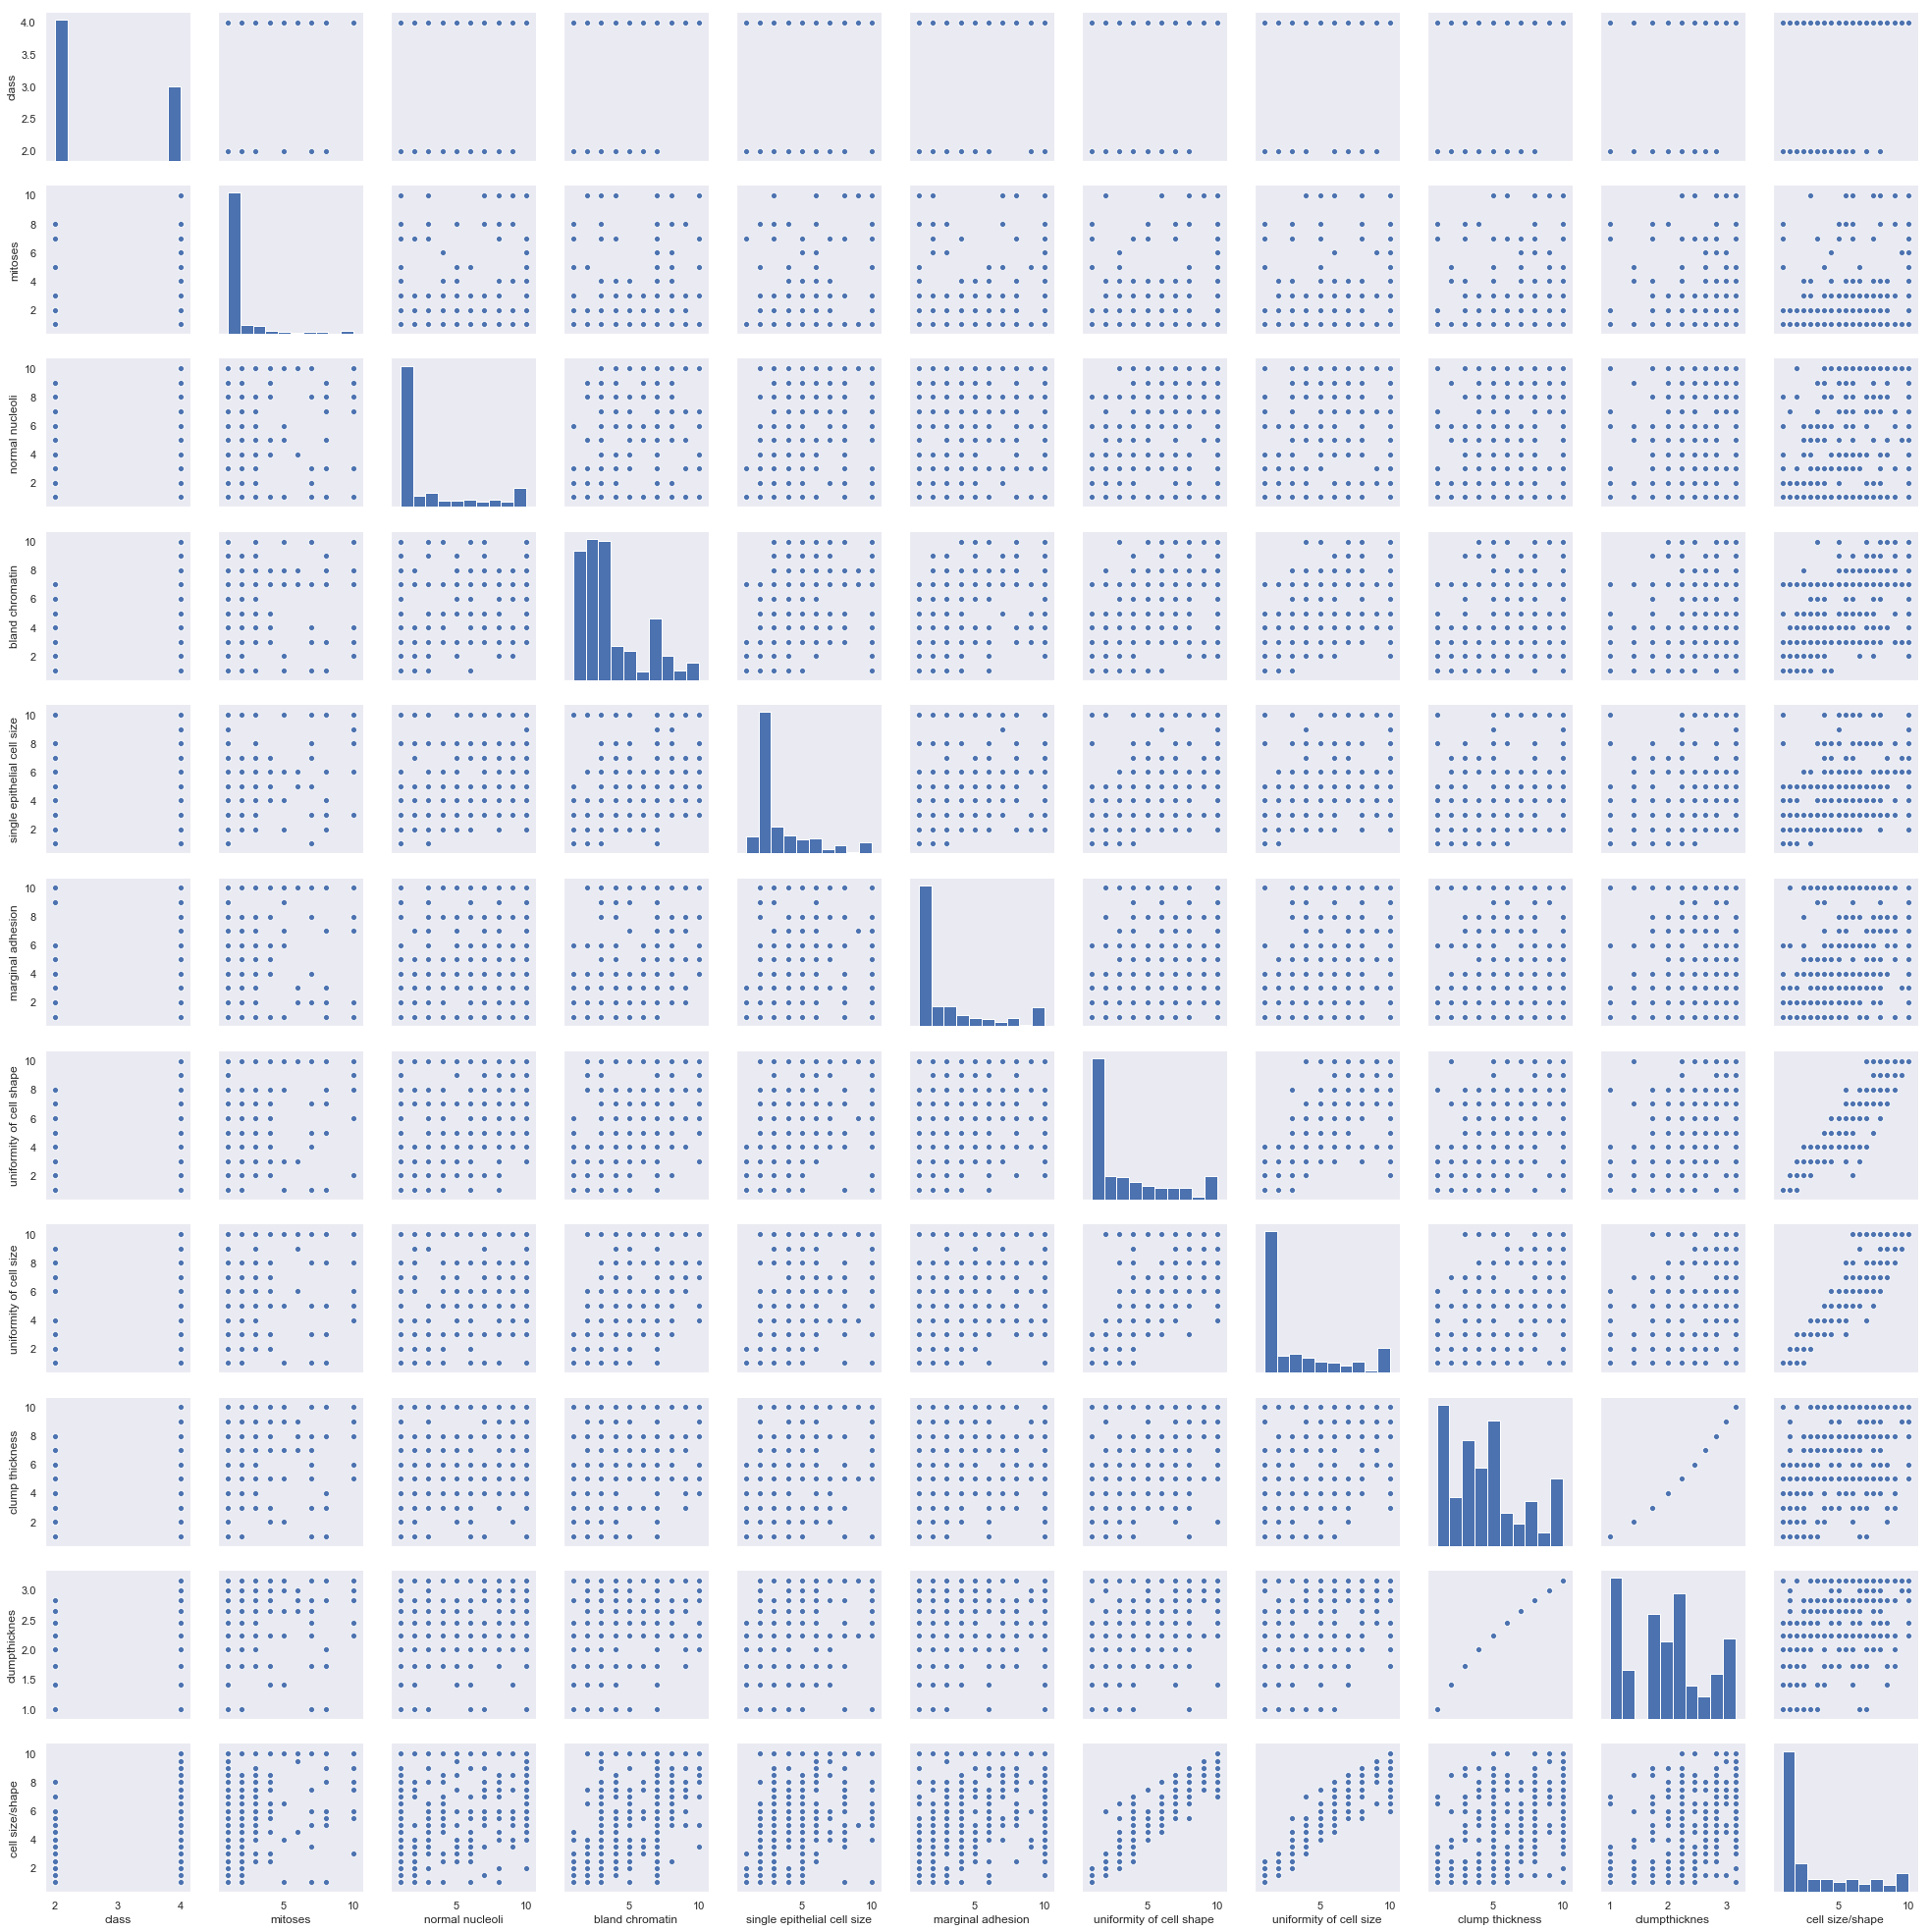

In [53]:
# Visualizing relationships among variables
sns.set(style="dark")
print(sns.pairplot(cancer))

                                class   mitoses  normal nucleoli  \
class                        1.000000  0.423008         0.712067   
mitoses                      0.423008  1.000000         0.428185   
normal nucleoli              0.712067  0.428185         1.000000   
bland chromatin              0.756732  0.344118         0.665914   
single epithelial cell size  0.682618  0.478975         0.628704   
marginal adhesion            0.696605  0.417476         0.603132   
uniformity of cell shape     0.818794  0.438756         0.719272   
uniformity of cell size      0.817772  0.458548         0.722699   
clump thickness              0.716509  0.350176         0.536176   

                             bland chromatin  single epithelial cell size  \
class                               0.756732                     0.682618   
mitoses                             0.344118                     0.478975   
normal nucleoli                     0.665914                     0.628704   
bland chrom

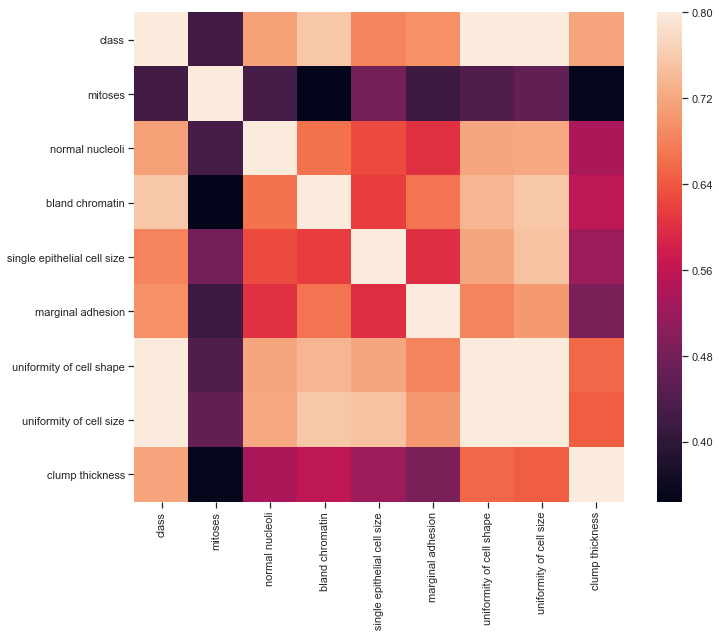

In [15]:
# Make the correlation matrix.
corrmat = cancer.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

According to the correlation heat map, the mitosis varible seems to offer the most unique information as it is not highly correlated with the other variables. This trait may be the most indicuative of whether or not an individual is diagnosed. 

Text(0.5, 1.0, 'Class Distributions')

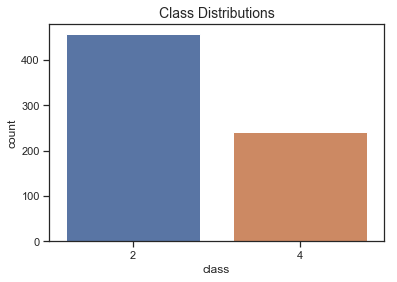

In [22]:
sns.countplot('class', data=cancer)
plt.title('Class Distributions', fontsize=14)

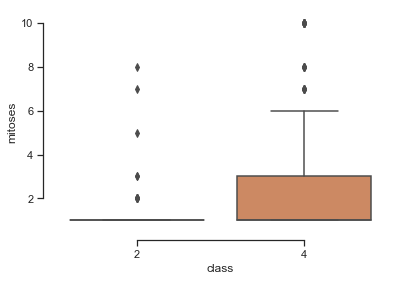

In [17]:
# Mitois seems to be highly predictive of malignat cancer 
sns.boxplot(x="class", y="mitoses", data=cancer)
sns.despine(offset=10, trim=True)

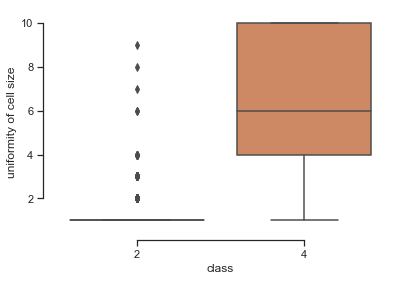

In [18]:
sns.boxplot(x="class", y="uniformity of cell size", data=cancer)
sns.despine(offset=10, trim=True)

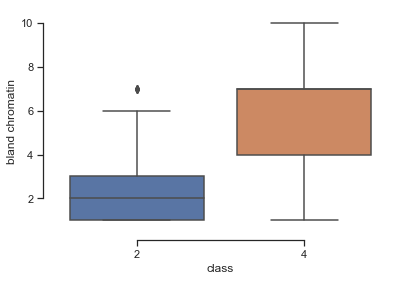

In [23]:
sns.boxplot(x="class", y="bland chromatin", data=cancer)
sns.despine(offset=10, trim=True)


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


,class,mitoses,normal nucleoli,bland chromatin,bare nuclei,single epithelial cell size,marginal adhesion,uniformity of cell shape,uniformity of cell size,clump thickness,clumpthicknes,cell size/shape
0,2,1,2,3,10,7,5,4,4,5,2.236068,4.0
1,2,1,1,3,2,2,1,1,1,3,1.732051,1.0
2,2,1,7,3,4,3,1,8,8,6,2.449490,8.0
3,2,1,1,3,1,2,3,1,1,4,2.000000,1.0
4,4,1,7,9,10,7,8,10,10,8,2.828427,10.0
5,2,1,1,3,10,2,1,1,1,1,1.000000,1.0
6,2,1,1,3,1,2,1,2,1,2,1.414214,1.5
7,2,5,1,1,1,2,1,1,1,2,1.414214,1.0
8,2,1,1,2,1,2,1,1,2,4,2.000000,1.5
9,2,1,1,3,1,1,1,1,1,1,1.000000,1.0


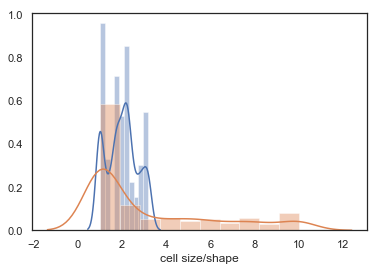

In [34]:
# Feature Engineering 
features = cancer

#altering clumpthickness
features['clumpthicknes'] = np.sqrt(cancer['clump thickness'])
print(sns.distplot(features['clumpthicknes']))

# Combinging redudndant features 
features['cell size/shape'] = (cancer['uniformity of cell shape'] + cancer['uniformity of cell size'])/2 
print(sns.distplot(features['cell size/shape']))

 


In [48]:
y = cancer['class']
features = features.drop('class', 1)


KeyError: "['class'] not found in axis"

In [49]:
print(features.dtypes)

print(y.dtypes)

mitoses                          int64
normal nucleoli                  int64
bland chromatin                  int64
bare nuclei                     object
single epithelial cell size      int64
marginal adhesion                int64
uniformity of cell shape         int64
uniformity of cell size          int64
clump thickness                  int64
clumpthicknes                  float64
cell size/shape                float64
dtype: object
int64


In [50]:
# Dropping this because cannot convert object for use in model 
features = features.drop('bare nuclei',axis=1)


In [52]:
# selectKbest 
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif

# Perform feature selection
selector = SelectKBest(f_classif, k='all')
selector.fit(features,y)

X_new = selector.transform(features)
X_new.shape
print(selector.get_support(indices=True))

# Most 10  useful cols 
X_new = selector.transform(features)
print(X_new.shape)
# Col names 
features.columns[selector.get_support(indices=True)]

[0 1 2 3 4 5 6 7 8 9]
(698, 10)


Index(['mitoses', 'normal nucleoli', 'bland chromatin',
       'single epithelial cell size', 'marginal adhesion',
       'uniformity of cell shape', 'uniformity of cell size',
       'clump thickness', 'clumpthicknes', 'cell size/shape'],
      dtype='object')

As shown in the correlation matrix heat map, the select k best method 
suggest that the mitosis varibale offers the most unique insights  

In [55]:
# PCA 

# PCA for 4 components 
from sklearn.decomposition import PCA

# Use PCA to create new columns 
pca = PCA(n_components=7)
principalComponents = pca.fit_transform(features)
pca_X = pd.DataFrame(data = principalComponents, 
                     columns = ['principal component 1', 'principal component 2', 'principal component 3', 
                                'principal component 4','principal component 5','principal component 6', 
                               'principal component 7'])



## Random Forest

In [58]:
# Model 3: Random Forest gridsearchcv  
from sklearn import ensemble
from sklearn.model_selection import GridSearchCV
rfc = ensemble.RandomForestClassifier()



param_grid = { 
    'n_estimators': [15, 200, 500, 750, 1000, 1500],
    'max_features': [1,2,4,6,7,8],
    'max_depth': [4,5,6,7,8]
}


grid = GridSearchCV(rfc, param_grid, cv=5, verbose=3, n_jobs=-1)

grid.fit(features,y)

# Show the best parameter and best score 
print(grid.best_params_)
print( grid.best_score_)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   59.1s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:  8.3min finished


{'max_depth': 6, 'max_features': 1, 'n_estimators': 200}
0.9641833810888252


With 20% Holdout: 0.9428571428571428
Testing on Sample: 0.9770773638968482
[0.91549296 0.95714286 0.97142857 0.9        0.98571429 0.97142857
 0.98571429 0.98550725 0.97101449 0.98550725]
Random Forest report :
              precision    recall  f1-score   support

           2       1.00      0.96      0.98        90
           4       0.93      1.00      0.96        50

   micro avg       0.97      0.97      0.97       140
   macro avg       0.96      0.98      0.97       140
weighted avg       0.97      0.97      0.97       140

AUC: 0.997


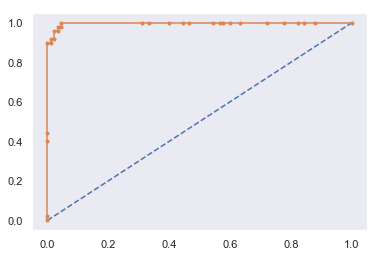

In [81]:
# Random forest model using select k best 
from sklearn import ensemble
rfc = ensemble.RandomForestClassifier(n_estimators=200, max_features= 1, max_depth=6)

from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(features, y ,test_size=0.2, random_state=100)
print('With 20% Holdout: ' + str(rfc.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(rfc.fit(features, y).score(features, y)))


# Cross validating using 10 folds  
from sklearn.model_selection import cross_val_score
print(cross_val_score(rfc, features, y, cv=10))


from sklearn.metrics import classification_report
print('Random Forest report :')
print(classification_report(y_test, rfc.predict(X_test)))


#AUC 
probs = rfc.predict_proba(X_test)
probs = probs[:, 1]

# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)



import matplotlib.pyplot as plt
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs, pos_label= 4 )
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

# show the plot
plt.show()



In [83]:
# Model 3: Random Forest gridsearchcv  
from sklearn import ensemble
from sklearn.model_selection import GridSearchCV
rfc = ensemble.RandomForestClassifier()

param_grid = { 
    'n_estimators': [15, 200, 500, 750],
    'max_features': [1,2,4,6,7],
    'max_depth': [4,5,6,7,8]
}


grid = GridSearchCV(rfc, param_grid, cv=5, verbose=3, n_jobs=-1)

grid.fit(pca_X,y)

# Show the best parameter and best score 
print(grid.best_params_)
print( grid.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   44.1s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  3.2min finished


{'max_depth': 4, 'max_features': 4, 'n_estimators': 200}
0.9699140401146131


With 20% Holdout: 0.9642857142857143
Testing on Sample: 0.9756446991404012
[0.92957746 0.98571429 0.97142857 0.91428571 0.98571429 0.97142857
 0.97142857 0.98550725 0.97101449 0.98550725]
Random Forest report :
              precision    recall  f1-score   support

           2       1.00      0.96      0.98        90
           4       0.93      1.00      0.96        50

   micro avg       0.97      0.97      0.97       140
   macro avg       0.96      0.98      0.97       140
weighted avg       0.97      0.97      0.97       140

AUC: 0.998


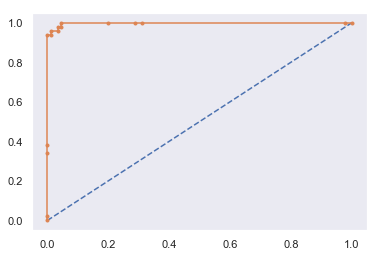

In [84]:
# Random forest model using select k best 
from sklearn import ensemble
rfc = ensemble.RandomForestClassifier(n_estimators=200, max_features= 4, max_depth=4)

from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(pca_X, y ,test_size=0.2, random_state=100)
print('With 20% Holdout: ' + str(rfc.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(rfc.fit(pca_X, y).score(pca_X, y)))


# Cross validating using 10 folds  
from sklearn.model_selection import cross_val_score
print(cross_val_score(rfc, pca_X, y, cv=10))


from sklearn.metrics import classification_report
print('Random Forest report :')
print(classification_report(y_test, rfc.predict(X_test)))


#AUC 
probs = rfc.predict_proba(X_test)
probs = probs[:, 1]

# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)


import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs, pos_label= 4 )
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

# show the plot
plt.show()

Both methods look like they are prone to overfitting with both AUC close to 1.00 under a random forest classifier, using pca or select k best suggest that both methods for selecting features are similiar, with PCA preforming slightly better. In all, this may not be the best model to use.   

## K - nearest neighbor

In [85]:
# Model 2: KNN gridsearch
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV 

# Initialize the model
knn = KNeighborsClassifier()

# Set parameters for KNN
# List of values to try 
knn_params = [{'n_neighbors': [2,3,5,7,10,15,25]}]

#GridSearchCV(estimator, param_grid, scoring=None, fit_params=None, 
    #n_jobs=None, iid=’warn’, refit=True, cv=’warn’, verbose=0, pre_dispatch=‘2*n_jobs’,
    #error_score=’raise-deprecating’, return_train_score=’warn’)

# Search for the best paramters. 
knn_grid = GridSearchCV(knn, knn_params, cv=7, verbose=1, n_jobs=-1)

# Fit the grid and obtain results
knn_grid.fit(features, y)

# Return best parameters and best score
print(knn_grid.best_params_)
print(knn_grid.best_score_)

Fitting 7 folds for each of 7 candidates, totalling 49 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


{'n_neighbors': 15}
0.9584527220630372


[Parallel(n_jobs=-1)]: Done  42 out of  49 | elapsed:    3.8s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  49 out of  49 | elapsed:    3.9s finished
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [86]:
# Model 2: KNN gridsearch
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV 

# Initialize the model
knn = KNeighborsClassifier()

# Set parameters for KNN
# List of values to try 
knn_params = [{'n_neighbors': [2,3,5,7,10,15,25]}]

#GridSearchCV(estimator, param_grid, scoring=None, fit_params=None, 
    #n_jobs=None, iid=’warn’, refit=True, cv=’warn’, verbose=0, pre_dispatch=‘2*n_jobs’,
    #error_score=’raise-deprecating’, return_train_score=’warn’)

# Search for the best paramters. 
knn_grid = GridSearchCV(knn, knn_params, cv=7, verbose=1, n_jobs=-1)

# Fit the grid and obtain results
knn_grid.fit(pca_X, y)

# Return best parameters and best score
print(knn_grid.best_params_)
print(knn_grid.best_score_)

Fitting 7 folds for each of 7 candidates, totalling 49 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


{'n_neighbors': 25}
0.9598853868194842


[Parallel(n_jobs=-1)]: Done  42 out of  49 | elapsed:    4.3s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  49 out of  49 | elapsed:    4.5s finished


With 20% Holdout: 0.9571428571428572
Testing on Sample: 0.9584527220630372
[0.91549296 0.97142857 0.95714286 0.9        0.97142857 0.94285714
 0.97142857 0.98550725 0.98550725 0.98550725]
KNN report :
              precision    recall  f1-score   support

           2       0.97      0.98      0.97        90
           4       0.96      0.94      0.95        50

   micro avg       0.96      0.96      0.96       140
   macro avg       0.96      0.96      0.96       140
weighted avg       0.96      0.96      0.96       140

AUC: 0.997


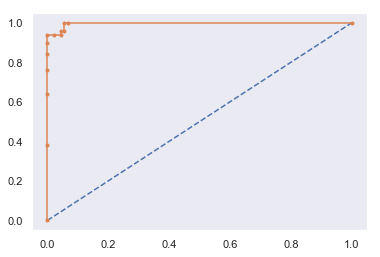

In [95]:
# Nearest neighbors model 
knn = KNeighborsClassifier(n_neighbors=20)

knn.fit(pca_X,y)

# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(pca_X,y, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(knn.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(knn.fit(pca_X, y).score(pca_X, y)))

# Cross validating using 10 folds  
from sklearn.model_selection import cross_val_score
print(cross_val_score(knn, pca_X, y, cv=10))

from sklearn.metrics import classification_report
print('KNN report :')
print(classification_report(y_test, knn.predict(X_test)))

#AUC 
probs = knn.predict_proba(X_test)
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs, pos_label= 4 )
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()


With 20% Holdout: 0.9571428571428572
Testing on Sample: 0.9627507163323782
[0.91549296 0.97142857 0.95714286 0.9        0.97142857 0.95714286
 0.97142857 0.97101449 0.97101449 0.98550725]
KNN report :
              precision    recall  f1-score   support

           2       0.98      0.98      0.98        90
           4       0.96      0.96      0.96        50

   micro avg       0.97      0.97      0.97       140
   macro avg       0.97      0.97      0.97       140
weighted avg       0.97      0.97      0.97       140

AUC: 0.997


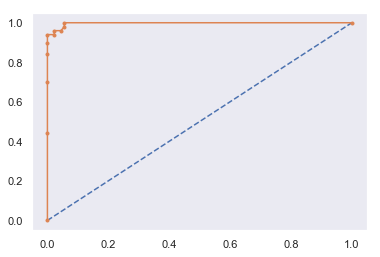

In [97]:
# Nearest neighbors model 
knn = KNeighborsClassifier(n_neighbors=15)

knn.fit(features,y)

# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(features,y, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(knn.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(knn.fit(features, y).score(features, y)))

# Cross validating using 10 folds  
from sklearn.model_selection import cross_val_score
print(cross_val_score(knn, features, y, cv=10))

from sklearn.metrics import classification_report
print('KNN report :')
print(classification_report(y_test, knn.predict(X_test)))

#AUC 
probs = knn.predict_proba(X_test)
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs, pos_label= 4 )
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()


K nearest neighbors preformed better than my random forest. This model may still be prone to overfitting while still maintaing highly accurate results, there was higher precision in correctly classifying cancerous cells. Using pca or select Kbest resulted in similar results but slight higher precision in clasifying non cancerous cells was higher without PCA.

## Logistic Regression

In [101]:
# Logistic Regression Gridsearch cv 
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression()

# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = (.00001,0.0001,0.001, 0.01, 0.1, 1, 10, 100)

# Create hyperparameter options
parameters = dict(C=C, penalty=penalty)

# Use GS-CV to see which alpha level is best.

logr_grid = GridSearchCV(logr, parameters, cv=5, verbose=1)

#Fit the logistic regression 
logr_grid.fit(features, y)

#return best parameters and best score

print(logr_grid.best_params_)
print(logr_grid.best_score_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solv

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework

{'C': 1, 'penalty': 'l2'}
0.9584527220630372


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework

In [102]:
# Logistic Regression Gridsearch cv 
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression()

# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = (.00001,0.0001,0.001, 0.01, 0.1, 1, 10, 100)

# Create hyperparameter options
parameters = dict(C=C, penalty=penalty)

# Use GS-CV to see which alpha level is best.

logr_grid = GridSearchCV(logr, parameters, cv=5, verbose=1)

#Fit the logistic regression 
logr_grid.fit(pca_X, y)

#return best parameters and best score

print(logr_grid.best_params_)
print(logr_grid.best_score_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solv

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework

{'C': 1e-05, 'penalty': 'l2'}
0.9641833810888252


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework

With 20% Holdout: 0.9428571428571428
Testing on Sample: 0.9641833810888252
[0.95774648 0.95714286 0.97142857 0.9        0.98571429 0.95714286
 0.97142857 0.98550725 0.97101449 0.98550725]
Logistic regression report :
              precision    recall  f1-score   support

           2       0.97      0.94      0.96        90
           4       0.90      0.94      0.92        50

   micro avg       0.94      0.94      0.94       140
   macro avg       0.93      0.94      0.94       140
weighted avg       0.94      0.94      0.94       140

AUC: 0.994


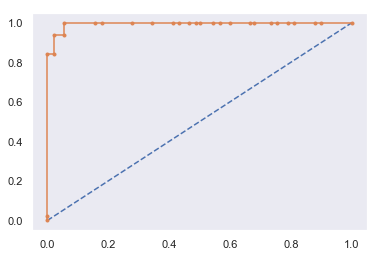

In [104]:
# Logistic regression model 
logr = LogisticRegression(C= 1e-05, penalty='l2')


logr.fit(pca_X,y)

# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(pca_X, y, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(logr.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(logr.fit(pca_X, y).score(pca_X, y)))

# Cross validating using 10 folds  
from sklearn.model_selection import cross_val_score
print(cross_val_score(logr, pca_X, y, cv=10))

from sklearn.metrics import classification_report
print('Logistic regression report :')
print(classification_report(y_test, logr.predict(X_test)))

#AUC 
probs = logr.predict_proba(X_test)
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs, pos_label= 4 )
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()



/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework

With 20% Holdout: 0.9642857142857143
Testing on Sample: 0.9641833810888252
[0.92957746 0.92857143 0.94285714 0.9        0.98571429 0.94285714
 0.98571429 0.98550725 0.97101449 0.98550725]
Logistic regression report :
              precision    recall  f1-score   support

           2       0.97      0.97      0.97        90
           4       0.94      0.94      0.94        50

   micro avg       0.96      0.96      0.96       140
   macro avg       0.95      0.95      0.95       140
weighted avg       0.96      0.96      0.96       140

AUC: 0.998


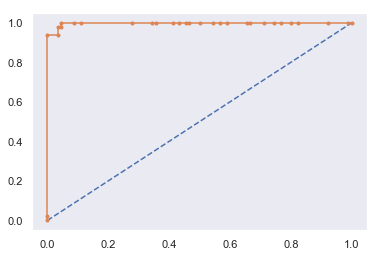

In [106]:
# Logistic regression model 
logr = LogisticRegression(C= 1, penalty='l2')


logr.fit(features,y)

# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(logr.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(logr.fit(features, y).score(features, y)))

# Cross validating using 10 folds  
from sklearn.model_selection import cross_val_score
print(cross_val_score(logr, features, y, cv=10))

from sklearn.metrics import classification_report
print('Logistic regression report :')
print(classification_report(y_test, logr.predict(X_test)))

#AUC 
probs = logr.predict_proba(X_test)
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs, pos_label= 4 )
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

The logistic regression model that does not use pca preformed better than the model that uses PCA. What is particularly significant is the higher rate of classifying cancerous cells. However, this model seems like it is prone to overfitting. 

## SVM Classifyer 

In [107]:
# SVM gridsearch for best parameters 
from sklearn.svm import SVC

svm = SVC()

# new parameters for this model
svc_params = [{'C': [.000001,.00001,.001,.01,.1,1,10], 'gamma': [.0001,.001,.01,.1]}]

# setting up the grid
svc_grid = GridSearchCV(svm, svc_params, cv=7, verbose=1, n_jobs=-1)

#Fit the grid
svc_grid.fit(features,y)

#return best parameters and best score

print(svc_grid.best_params_)
print(svc_grid.best_score_)

Fitting 7 folds for each of 28 candidates, totalling 196 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.0s


{'C': 1, 'gamma': 0.01}
0.9613180515759312


[Parallel(n_jobs=-1)]: Done 189 out of 196 | elapsed:   10.2s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 196 out of 196 | elapsed:   10.2s finished
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [108]:
# SVM gridsearch for best parameters 
from sklearn.svm import SVC

svm = SVC()

# new parameters for this model
svc_params = [{'C': [.000001,.00001,.001,.01,.1,1,10], 'gamma': [.0001,.001,.01,.1]}]

# setting up the grid
svc_grid = GridSearchCV(svm, svc_params, cv=7, verbose=1, n_jobs=-1)

#Fit the grid
svc_grid.fit(pca_X,y)

#return best parameters and best score

print(svc_grid.best_params_)
print(svc_grid.best_score_)

Fitting 7 folds for each of 28 candidates, totalling 196 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed:    3.1s


{'C': 0.1, 'gamma': 0.01}
0.9598853868194842


[Parallel(n_jobs=-1)]: Done 196 out of 196 | elapsed:    4.0s finished
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [113]:
# SVM model using pca 
from sklearn.svm import SVC
svm = SVC(C=0.1, gamma=.01)

svm.fit(pca_X,y)

# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(pca_X, y, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(svm.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(svm.fit(pca_X, y).score(pca_X, y)))

# Cross validating using 10 folds  
from sklearn.model_selection import cross_val_score
print(cross_val_score(svm, pca_X, y, cv=10))

from sklearn.metrics import classification_report
print('SVM report :')
print(classification_report(y_test, svm.predict(X_test)))

#AUC 
#trick sklearn:
probs = svm.predict_proba(X_test)
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs, pos_label= 4 )
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()


With 20% Holdout: 0.9571428571428572
Testing on Sample: 0.9613180515759312
[0.91549296 0.95714286 0.97142857 0.9        0.98571429 0.97142857
 0.97142857 0.98550725 0.97101449 0.98550725]
SVM report :
              precision    recall  f1-score   support

           2       0.97      0.96      0.96        90
           4       0.92      0.94      0.93        50

   micro avg       0.95      0.95      0.95       140
   macro avg       0.94      0.95      0.95       140
weighted avg       0.95      0.95      0.95       140



AttributeError: predict_proba is not available when  probability=False

In [114]:
# SVM model using features 
from sklearn.svm import SVC
svm = SVC(C=1, gamma=.01)

svm.fit(features,y)

# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(features,y, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(svm.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(svm.fit(features, y).score(features, y)))

# Cross validating using 10 folds  
from sklearn.model_selection import cross_val_score
print(cross_val_score(svm, features,y, cv=10))

from sklearn.metrics import classification_report
print('SVM report :')
print(classification_report(y_test, svm.predict(X_test)))


#AUC 
#trick sklearn:
probs = svm.predict_proba(X_test)
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs, pos_label= 4 )
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()


With 20% Holdout: 0.95
Testing on Sample: 0.9670487106017192
[0.91549296 0.95714286 0.97142857 0.9        0.98571429 0.97142857
 0.97142857 0.98550725 0.97101449 0.98550725]
SVM report :
              precision    recall  f1-score   support

           2       0.99      0.97      0.98        90
           4       0.94      0.98      0.96        50

   micro avg       0.97      0.97      0.97       140
   macro avg       0.97      0.97      0.97       140
weighted avg       0.97      0.97      0.97       140



AttributeError: predict_proba is not available when  probability=False

The model using both select k best and PCA preformed very well. I need to find a way to visualize AUC to fully compare this models performance to others. 

## Gradient Boosting

In [115]:
# Parameters to test in gridsearch cv 



params = {'n_estimators': [50, 100, 150, 200, 300, 500, 700, 1000, 1500],
          'max_depth': [2,3,4,5,6,7,8],
         }

# Initialize and fit the model.
gb = ensemble.GradientBoostingClassifier()

# Use the grid
gb_grid = GridSearchCV(gb, params, cv=5, verbose=1, n_jobs=-1)

# Fit the grid
gb_grid.fit(features, y)

# Return best parameters and best score
print(gb_grid.best_params_)
print(gb_grid.best_score_)

Fitting 5 folds for each of 63 candidates, totalling 315 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   17.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 315 out of 315 | elapsed:  2.3min finished
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'max_depth': 2, 'n_estimators': 500}
0.9613180515759312


In [116]:
# Parameters to test in gridsearch cv 

params = {'n_estimators': [50, 100, 150, 200, 300, 500, 700, 1000, 1500],
          'max_depth': [2,3,4,5,6,7,8],
         }

# Initialize and fit the model.
gb = ensemble.GradientBoostingClassifier()

# Use the grid
gb_grid = GridSearchCV(gb, params, cv=5, verbose=1, n_jobs=-1)

# Fit the grid
gb_grid.fit(pca_X, y)

# Return best parameters and best score
print(gb_grid.best_params_)
print(gb_grid.best_score_)

Fitting 5 folds for each of 63 candidates, totalling 315 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   17.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.3min


{'max_depth': 2, 'n_estimators': 50}
0.9627507163323782


[Parallel(n_jobs=-1)]: Done 315 out of 315 | elapsed:  2.4min finished


With 20% Holdout: 0.9571428571428572
Testing on Sample: 0.9756446991404012
[0.91549296 0.97142857 0.97142857 0.91428571 0.98571429 0.97142857
 0.97142857 0.98550725 0.97101449 0.98550725]
Gradient Boosting report :
              precision    recall  f1-score   support

           2       0.99      0.98      0.98        90
           4       0.96      0.98      0.97        50

   micro avg       0.98      0.98      0.98       140
   macro avg       0.97      0.98      0.98       140
weighted avg       0.98      0.98      0.98       140

AUC: 0.999


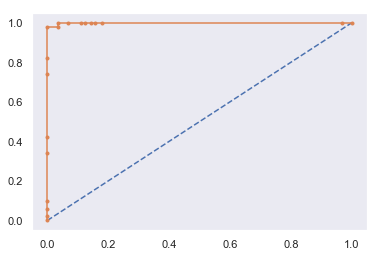

In [118]:
# Gradient boosting model 
# Best Parameters from gridsearchcv 
params = {'n_estimators': 50,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.
gb = ensemble.GradientBoostingClassifier(**params)

gb.fit(pca_X,y)


# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(pca_X,y, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(gb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(gb.fit(pca_X, y).score(pca_X, y)))

# Cross validating using 10 folds  
from sklearn.model_selection import cross_val_score
print(cross_val_score(gb, pca_X, y, cv=10))

from sklearn.metrics import classification_report
print('Gradient Boosting report :')
print(classification_report(y_test, gb.predict(X_test)))

#AUC 
probs = gb.predict_proba(X_test)
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs, pos_label= 4 )
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()


With 20% Holdout: 0.9428571428571428
Testing on Sample: 0.998567335243553
[0.88732394 0.98571429 0.94285714 0.92857143 0.98571429 0.95714286
 0.97142857 0.98550725 0.97101449 1.        ]
Gradient Boosting report :
              precision    recall  f1-score   support

           2       1.00      1.00      1.00        90
           4       1.00      1.00      1.00        50

   micro avg       1.00      1.00      1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140

AUC: 1.000


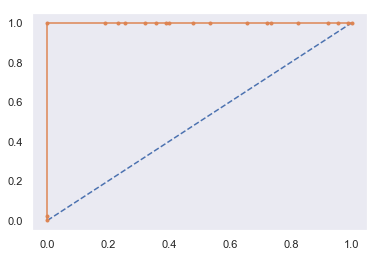

In [120]:
# Gradient boosting model 
# Best Parameters from gridsearchcv 
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.
gb = ensemble.GradientBoostingClassifier(**params)

gb.fit(features,y)

# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(features,y, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(gb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(gb.fit(features, y).score(features, y)))

# Cross validating using 10 folds  
from sklearn.model_selection import cross_val_score
print(cross_val_score(gb, pca_X, y, cv=10))

from sklearn.metrics import classification_report
print('Gradient Boosting report :')
print(classification_report(y_test, gb.predict(X_test)))

#AUC 
probs = gb.predict_proba(X_test)
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs, pos_label= 4 )
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()


Both models seem to suffer highly from overfitting, with the model relying on non-PCA features suffering from complete overfit. This makes sense as the random forest model also did not perform well. What is it about this data that makes these models more prone to overfitting? It may have to due with the size of the dataset as it only has around 600 rows. 

## Decision Tree

In [121]:
# Decision Tree Gridsearch 
from sklearn.tree import DecisionTreeClassifier


# Initialize the model
decision_tree = DecisionTreeClassifier()

# Set parameters for dtc
params = [{'max_features': [2, 4, 6, 8],
             'max_depth': [2, 4, 6, 8]}]

# Search for the best paramters. 
decision_tree_grid = GridSearchCV(decision_tree, params, cv=5, verbose=1, n_jobs=-1)

# Fit the grid and obtain results
decision_tree_grid.fit(features, y)

# Return best parameters and best score
print(decision_tree_grid.best_params_)
print(decision_tree_grid.best_score_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


{'max_depth': 4, 'max_features': 8}
0.9455587392550143


[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    5.6s finished


In [123]:
# Decision Tree Gridsearch 
from sklearn.tree import DecisionTreeClassifier


# Initialize the model
decision_tree = DecisionTreeClassifier()

# Set parameters for dtc
params = [{'max_features': [2, 4, 6, 7],
             'max_depth': [2, 4, 6, 8]}]

# Search for the best paramters. 
decision_tree_grid = GridSearchCV(decision_tree, params, cv=5, verbose=1, n_jobs=-1)

# Fit the grid and obtain results
decision_tree_grid.fit(pca_X, y)

# Return best parameters and best score
print(decision_tree_grid.best_params_)
print(decision_tree_grid.best_score_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


{'max_depth': 2, 'max_features': 7}
0.9684813753581661


[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    6.3s finished
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


With 20% Holdout: 0.9571428571428572
Testing on Sample: 0.9684813753581661
[0.95774648 0.97142857 0.97142857 0.91428571 0.94285714 0.97142857
 0.97142857 0.98550725 0.97101449 0.98550725]
Decision Tree report :
              precision    recall  f1-score   support

           2       0.99      0.94      0.97        90
           4       0.91      0.98      0.94        50

   micro avg       0.96      0.96      0.96       140
   macro avg       0.95      0.96      0.95       140
weighted avg       0.96      0.96      0.96       140

AUC: 0.988


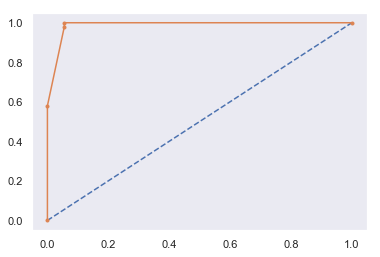

In [124]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

decision_tree = DecisionTreeClassifier( 
    criterion='entropy',
    max_features=7,
    max_depth=2)


from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(pca_X,y, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(decision_tree.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(decision_tree.fit(pca_X, y).score(pca_X, y)))


# Cross validating using 10 folds  
from sklearn.model_selection import cross_val_score
print(cross_val_score(decision_tree, pca_X, y, cv=10))


from sklearn.metrics import classification_report
print('Decision Tree report :')
print(classification_report(y_test, decision_tree.predict(X_test)))

#AUC 
probs = decision_tree.predict_proba(X_test)
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs, pos_label= 4)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

With 20% Holdout: 0.9642857142857143
Testing on Sample: 0.9656160458452722
[0.88732394 0.9        0.9        0.9        0.92857143 0.94285714
 1.         0.98550725 0.97101449 0.98550725]
Decision Tree report :
              precision    recall  f1-score   support

           2       0.98      1.00      0.99        90
           4       1.00      0.96      0.98        50

   micro avg       0.99      0.99      0.99       140
   macro avg       0.99      0.98      0.98       140
weighted avg       0.99      0.99      0.99       140

AUC: 0.999


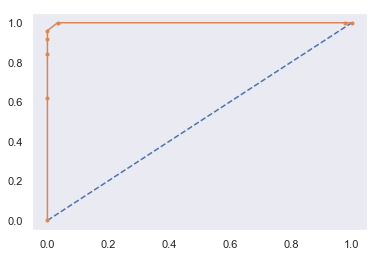

In [125]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

decision_tree = DecisionTreeClassifier( 
    criterion='entropy',
    max_features=8,
    max_depth=4)


from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(features,y, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(decision_tree.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(decision_tree.fit(features, y).score(features, y)))


# Cross validating using 10 folds  
from sklearn.model_selection import cross_val_score
print(cross_val_score(decision_tree, features, y, cv=10))


from sklearn.metrics import classification_report
print('Decision Tree report :')
print(classification_report(y_test, decision_tree.predict(X_test)))

#AUC 
probs = decision_tree.predict_proba(X_test)
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs, pos_label= 4)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In this instance, the PCA model performed much better than the model that relyed on non PCA features. The better preforming model did have a much higher accuracy with predicting non cancerous cells than cancerous cells. The first model seem to be the least overfit model while maintaing the strongest performance.

With 20% Holdout: 0.6428571428571429
Testing on Sample: 0.6547277936962751
[0.64788732 0.65714286 0.65714286 0.65714286 0.65714286 0.65714286
 0.65714286 0.65217391 0.65217391 0.65217391]
Native Bayes Classification report :
              precision    recall  f1-score   support

           2       0.64      1.00      0.78        90
           4       0.00      0.00      0.00        50

   micro avg       0.64      0.64      0.64       140
   macro avg       0.32      0.50      0.39       140
weighted avg       0.41      0.64      0.50       140

AUC: 0.500


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


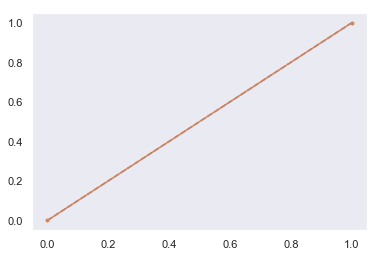

In [127]:
# Native Bayes 

from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split


# Instantiate our model and Fit our model to the data.
bnb = BernoulliNB()
bnb.fit(features, y)

# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(features,y, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(features, y).score(features, y)))

# Cross validating using 10 folds  
from sklearn.model_selection import cross_val_score
print(cross_val_score(bnb,features, y, cv=10))

#Classification report 
from sklearn.metrics import classification_report
print('Native Bayes Classification report :')
print(classification_report(y_test, bnb.predict(X_test)))

#AUC 
probs = bnb.predict_proba(X_test)
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs, pos_label= 4)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()


With 20% Holdout: 0.9428571428571428
Testing on Sample: 0.9641833810888252
[0.95774648 0.95714286 0.97142857 0.9        0.98571429 0.95714286
 0.97142857 0.98550725 0.97101449 0.98550725]
Native Bayes Classification report :
              precision    recall  f1-score   support

           2       0.97      0.94      0.96        90
           4       0.90      0.94      0.92        50

   micro avg       0.94      0.94      0.94       140
   macro avg       0.93      0.94      0.94       140
weighted avg       0.94      0.94      0.94       140

AUC: 0.958


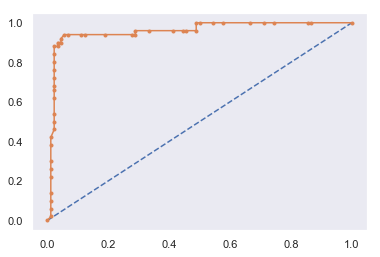

In [128]:
# Native Bayes 

from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split


# Instantiate our model and Fit our model to the data.
bnb = BernoulliNB()
bnb.fit(pca_X, y)

# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(pca_X,y, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(pca_X, y).score(pca_X, y)))

# Cross validating using 10 folds  
from sklearn.model_selection import cross_val_score
print(cross_val_score(bnb,pca_X , y, cv=10))

#Classification report 
from sklearn.metrics import classification_report
print('Native Bayes Classification report :')
print(classification_report(y_test, bnb.predict(X_test)))

#AUC 
probs = bnb.predict_proba(X_test)
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs, pos_label= 4)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()


The use of PCA had a highly significant impact on the performance of the model as the classification report and AUC plot suggest. The use of all the variables without PCA was the worst performing model other than those that suffered from overfitting. 

## Conclusion 

In conclusion, the most effective model for this dataset is the decision tree, SVM classifier, and the naive Bayes classifier. Of all of the models, the Naive Bayes classifier performed the best because while each of the models has similar performance on the test sample, it seems to be the least overfit. Overfitting was a challenge I encountered in most of the models and this may come from the small size of the data set. In my earlier analysis, I found that the mitosis state of the cell is the most indicative trait in a cell that would be diagnosed as cancerous. 